In [1]:
# Import libraries
import tensorflow as tf
import numpy as np
from tensorflow import keras
from sklearn import datasets
from sklearn import neural_network
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Make predictions using SKLearn

In [55]:
# Load digits dataset
load_dataset = datasets.load_digits()
dataset = load_dataset.data
target_names = load_dataset.target_names

In [56]:
# Split train and test dataset
train_data, test_data, train_label, test_label = train_test_split(dataset, load_dataset.target, test_size=0.2)
train_data.shape

(1437, 64)

In [57]:
# Create model
model = neural_network.MLPClassifier()
model.fit(train_data, train_label)

MLPClassifier()

In [58]:
# Make predictions on test data
prediction = model.predict(test_data)

for i in range(5):
    print("Prediction: {} Actual: {}".format(prediction[i], test_label[i]))

Prediction: 3 Actual: 3
Prediction: 8 Actual: 8
Prediction: 6 Actual: 6
Prediction: 7 Actual: 7
Prediction: 1 Actual: 1


In [12]:
# Calculate accuracy score
accuracy_score(test_label, prediction) * 100

97.77777777777777

# Make predictions using Tensorflow

In [16]:
# Load digits dataset from keras datasets
(train_data, train_targets), (test_data, test_targets) = keras.datasets.mnist.load_data()
train_data[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [29]:
train_data.shape

(60000, 28, 28)

In [24]:
# Create and compile model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(train_data.shape[1:])),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(0.001), metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Train model
history = model.fit(train_data, train_targets, epochs=20, validation_split=0.2, verbose=2)

Epoch 1/20
1500/1500 - 2s - loss: 2.7790 - accuracy: 0.7958 - val_loss: 0.6465 - val_accuracy: 0.8604
Epoch 2/20
1500/1500 - 1s - loss: 0.5457 - accuracy: 0.8706 - val_loss: 0.4461 - val_accuracy: 0.8965
Epoch 3/20
1500/1500 - 1s - loss: 0.3816 - accuracy: 0.9025 - val_loss: 0.3989 - val_accuracy: 0.9123
Epoch 4/20
1500/1500 - 1s - loss: 0.3179 - accuracy: 0.9191 - val_loss: 0.3101 - val_accuracy: 0.9206
Epoch 5/20
1500/1500 - 1s - loss: 0.2800 - accuracy: 0.9267 - val_loss: 0.2854 - val_accuracy: 0.9269
Epoch 6/20
1500/1500 - 1s - loss: 0.2488 - accuracy: 0.9349 - val_loss: 0.2857 - val_accuracy: 0.9276
Epoch 7/20
1500/1500 - 1s - loss: 0.2327 - accuracy: 0.9364 - val_loss: 0.3372 - val_accuracy: 0.9236
Epoch 8/20
1500/1500 - 2s - loss: 0.2185 - accuracy: 0.9415 - val_loss: 0.2522 - val_accuracy: 0.9381
Epoch 9/20
1500/1500 - 1s - loss: 0.2100 - accuracy: 0.9431 - val_loss: 0.2899 - val_accuracy: 0.9411
Epoch 10/20
1500/1500 - 1s - loss: 0.2026 - accuracy: 0.9454 - val_loss: 0.2609 - 

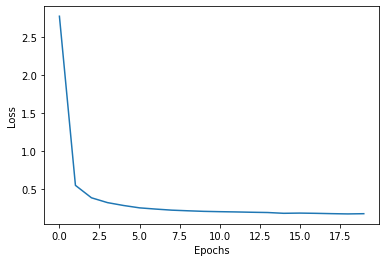

In [26]:
# Plot loss curve
plt.figure()
plt.plot(history.epoch, history.history['loss'], label='Loss')
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

In [27]:
# Make predictions on test data
prediction = model.predict(test_data)

for i in range(5):
    print("Prediction: {} Actual: {}".format(np.argmax(prediction[i]), test_targets[i]))

Prediction: 7 Actual: 7
Prediction: 2 Actual: 2
Prediction: 1 Actual: 1
Prediction: 0 Actual: 0
Prediction: 4 Actual: 4


In [28]:
# Check models accuracy
loss, accuracy = model.evaluate(test_data, test_targets)
print(accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.3412 - accuracy: 0.9379
0.9379000067710876
